In [67]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from math import sqrt

# Линейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + a\frac{\partial f}{\partial x} = 0, a > 0 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [68]:
a = 1    # > 0
f1 = 10

dx = 0.005
dt = 0.003

N = 500
T = 900

In [69]:
def getPrecise(t):
    res = np.zeros(N)
    max_i = int(a*t/dx)+1
    if max_i > N:
        max_i = N
    for i in range(max_i):
        res[i] = f1
        
    return res

In [70]:
sigma = a*dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  0.6


### Схема Лакса

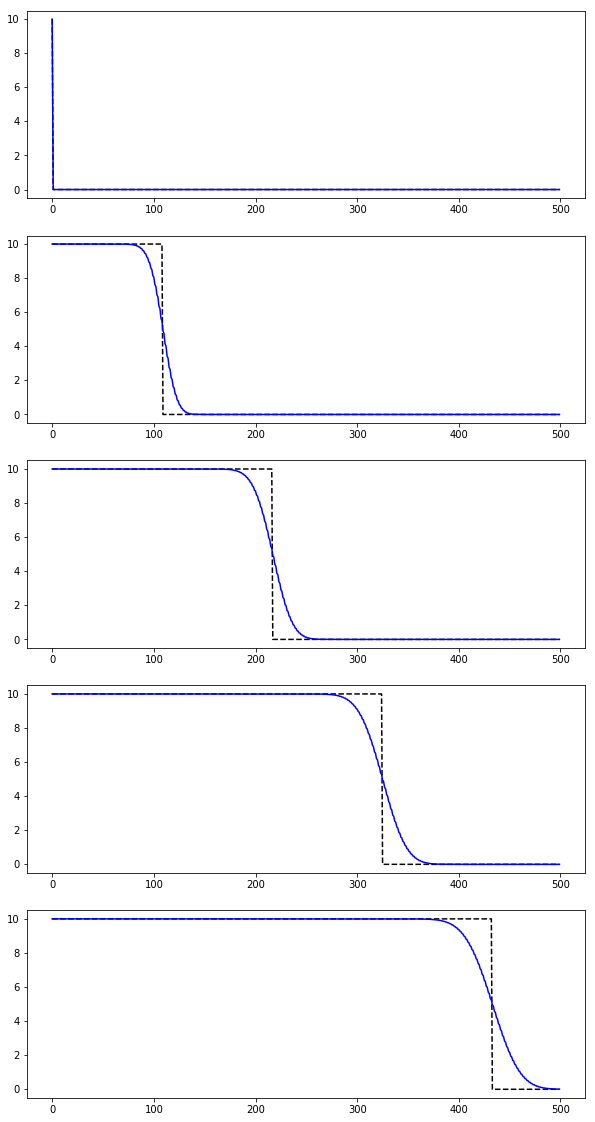

In [71]:
lin_lax = np.zeros((T,N))

for n in range(-1, T-1):
    lin_lax[n+1][0] = f1
    for i in range(1, N-1):
        A = lin_lax[n][i-1]
        B = lin_lax[n][i+1]
        lin_lax[n+1][i] = (B+A)/2 - sigma/2 * (B-A)
    lin_lax[n+1][N-1] = lin_lax[n][N-2]
        

frames = 5

fig, ax = plt.subplots(nrows = frames, ncols = 1,figsize = (10, 20))
xdata = range(N)

for t in range(frames):
    ax[t].plot(xdata, getPrecise(T//frames*t*dt), color = 'k', linestyle = '--')
    ax[t].plot(xdata, lin_lax[T//frames*t], color = 'b', linestyle = '-')

### Схема TVD

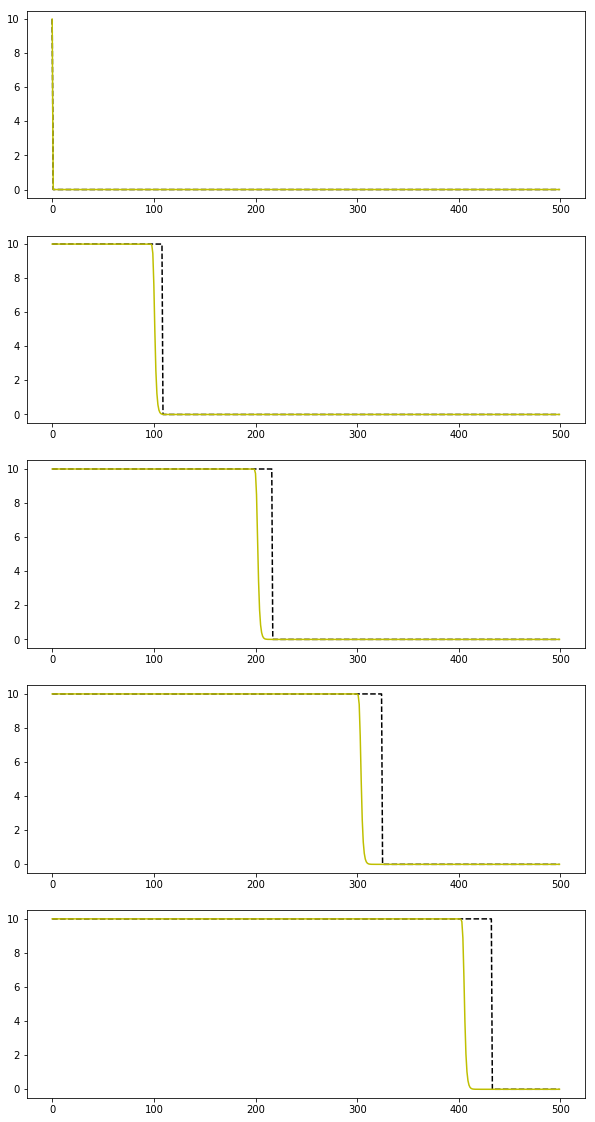

In [72]:
epsilon = 1e-8
lin_lw_s = np.zeros((T,N))

for n in range(-1, T-1):
    lin_lw_s[n+1][0] = f1
    for i in range(1, N-1):
        A = lin_lw_s[n][i-1]
        E = lin_lw_s[n][i]
        B = lin_lw_s[n][i+1]
        
        rm = (E-A+epsilon)/(B-E+epsilon)
        if rm > 1:
            phi = min(2, rm)
        elif rm > 0:
            phi = min(2*rm, 1)
        else:
            phi = 0
        
        fp = 0.5*sigma*phi*(1-sigma)*(B-E)
        fn = 0.5*sigma*phi*(1-sigma)*(E-A)
        
        lin_lw_s[n+1][i] = lin_lw_s[n][i] - sigma*(E-A) - (fp-fn)
    lin_lw_s[n+1][N-1] = lin_lw_s[n][N-2]


frames = 5

fig, ax = plt.subplots(nrows = frames, ncols = 1,figsize = (10, 20))
xdata = range(N)

for t in range(frames):
    ax[t].plot(xdata, getPrecise(T//frames*t*dt), color = 'k', linestyle = '--')
    ax[t].plot(xdata, lin_lw_s[T//frames*t], color = 'y', linestyle = '-')

### Сравнение

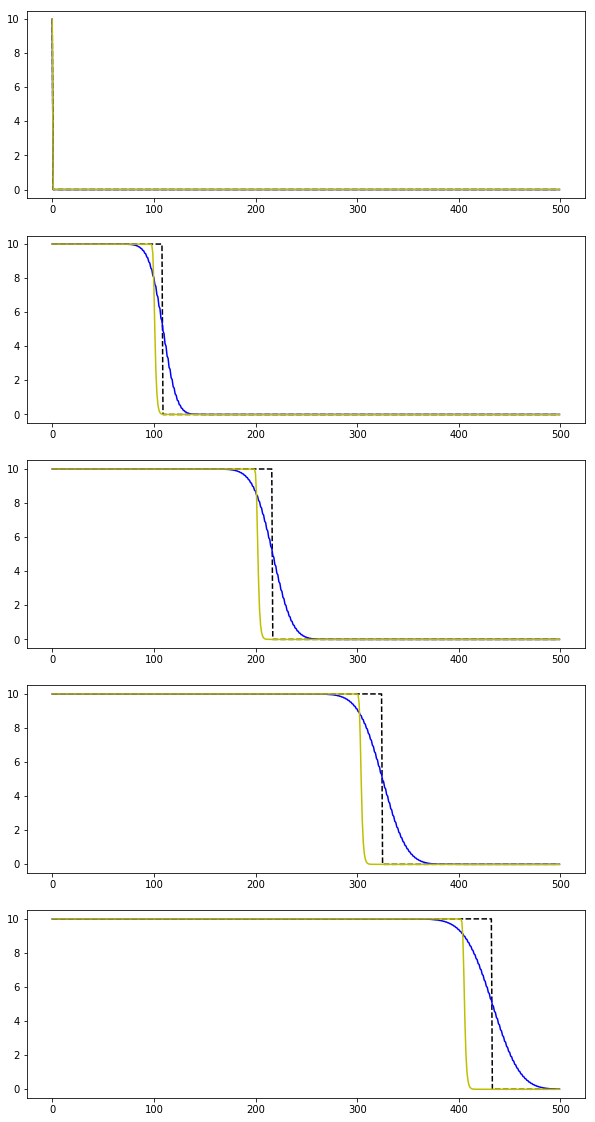

In [73]:
frames = 5

fig, ax = plt.subplots(nrows = frames, ncols = 1,figsize = (10, 20))
xdata = range(N)

for t in range(frames):
    ax[t].plot(xdata, getPrecise(T//frames*t*dt), color = 'k', linestyle = '--')
    ax[t].plot(xdata, lin_lax[T//frames*t], color = 'b', linestyle = '-')
    ax[t].plot(xdata, lin_lw_s[T//frames*t], color = 'y', linestyle = '-')

# Нелинейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + \frac{\partial F}{\partial x} = 0, F = f^2/2 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [74]:
f1 = 0.8

dx = 0.01
dt = 0.01

N = 300
T = 1000

In [75]:
sigma = dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  1.0


### Схема Лакса

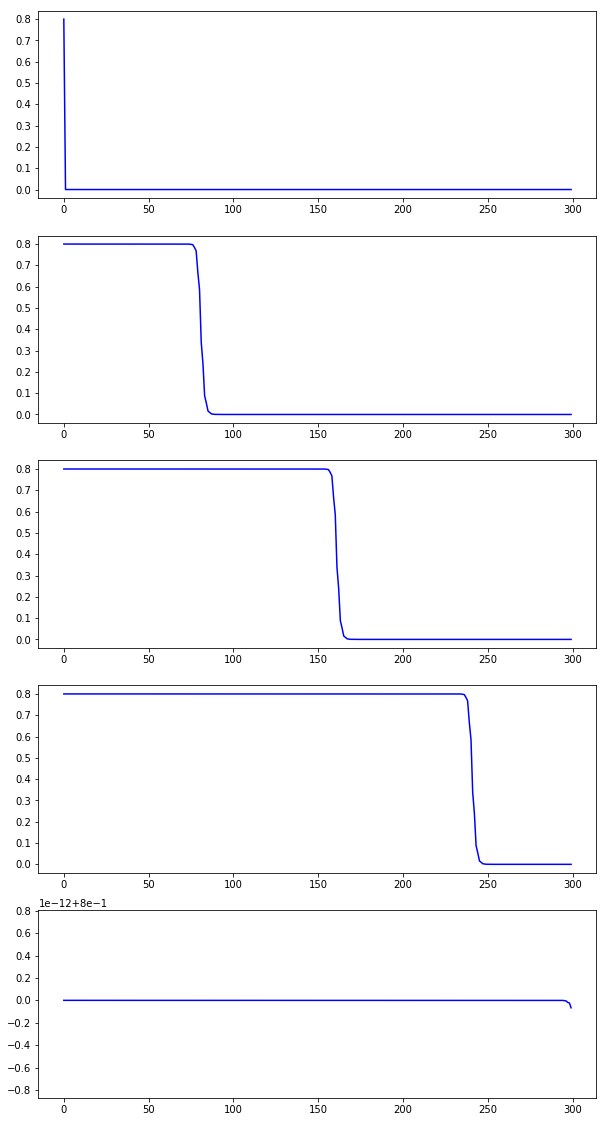

In [76]:
f = np.zeros((T,N))

for n in range(-1, T-1):
    f[n+1][0] = f1
    for i in range(1, N-1):
        a = f[n][i-1]
        b = f[n][i+1]
        A = f[n][i-1]**2/2
        B = f[n][i+1]**2/2
        f[n+1][i] = (b+a)/2 - sigma/2 * (B-A)
    f[n+1][N-1] = f[n][N-2]


frames = 5

fig, ax = plt.subplots(nrows = frames, ncols = 1,figsize = (10, 20))
xdata = range(N)

for t in range(frames):
    ax[t].plot(xdata, f[T//frames*t], color = 'b', linestyle = '-')

### Схема TVD

In [77]:
epsilon = 1e-8
lin_lw_s = np.zeros((T,N))

for n in range(-1, T-1):
    lin_lw_s[n+1][0] = f1
    for i in range(1, N-1):
        A = lin_lw_s[n][i-1]
        E = lin_lw_s[n][i]
        B = lin_lw_s[n][i+1]
        
        rm = (E-A+epsilon)/(B-E+epsilon)
        if rm > 1:
            phi = min(2, rm)
        elif rm > 0:
            phi = min(2*rm, 1)
        else:
            phi = 0
        
        fp = 0.5*sigma*phi*(1-sigma)*(B-E)
        fn = 0.5*sigma*phi*(1-sigma)*(E-A)
        
        lin_lw_s[n+1][i] = lin_lw_s[n][i] - sigma*sigma*(E**2-A**2)/2 - (fp**2/2-fn**2/2)
    lin_lw_s[n+1][N-1] = lin_lw_s[n][N-2]

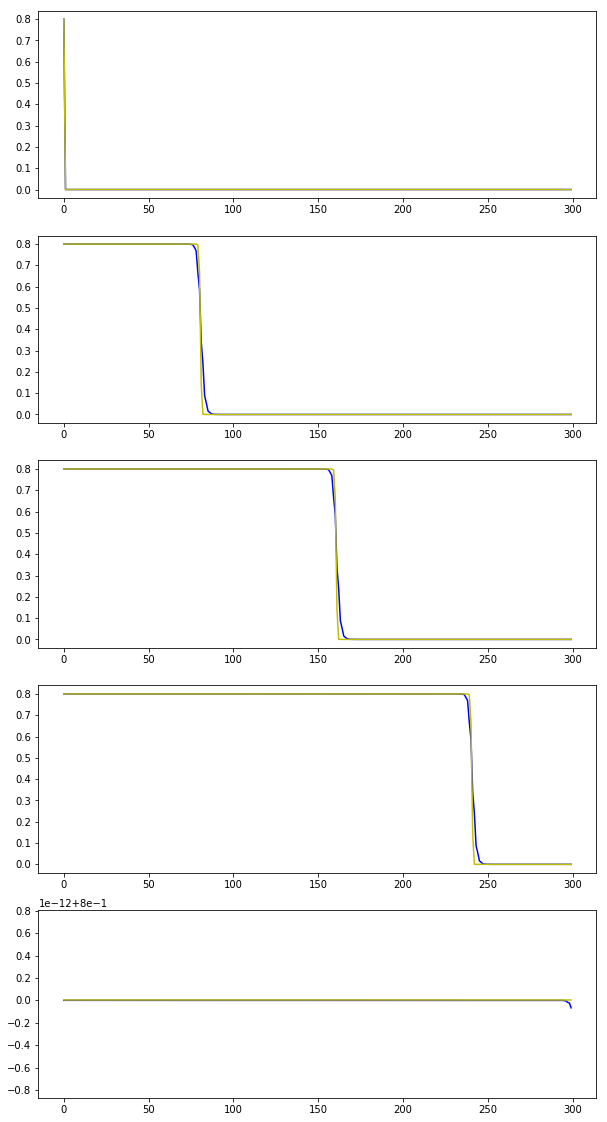

In [78]:
frames = 5

fig, ax = plt.subplots(nrows = frames, ncols = 1,figsize = (10, 20))
xdata = range(N)

for t in range(frames):
    ax[t].plot(xdata, f[T//frames*t], color = 'b', linestyle = '-')
    ax[t].plot(xdata, lin_lw_s[T//frames*t], color = 'y', linestyle = '-')